# Machine Learning Sederhana


### 1. import library yang di perlukan


In [30]:
%matplotlib widget

import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### 2. generate data


{'rasioForTen': 0.1, 'x': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]), 'y': array([ 0.75589859,  0.82115685,  0.64672145,  0.68574993,  1.27868721,
        1.43556174,  1.31904921,  0.79543572,  1.21489192,  1.60379864,
        1.60465223,  1.86476777,  1.52110566,  1.37398934,  2.21273295,
        2.36161156,  1.63568525,  2.35864554,  1.90306995,  2.36585925,
        2.35839103,  3.08849623,  3.0725817 ,  2.52710659,  2.9839606 ,
        3.29512814,  2.77930399,  3.09857828,  3.26

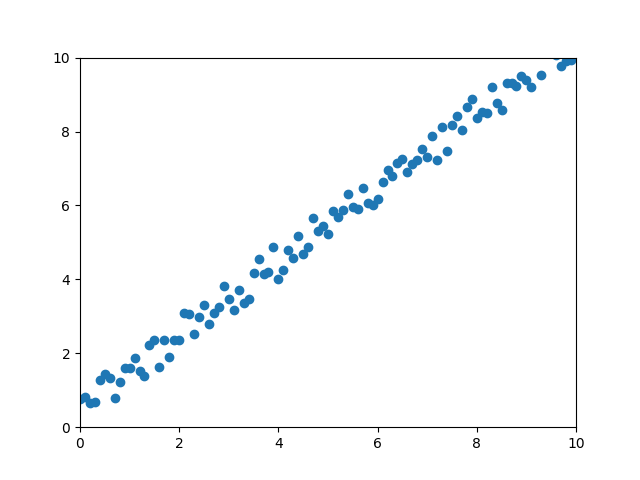

In [31]:
jumlah_data = 100
rasioForTen = 10 / jumlah_data

x = np.array([(i * rasioForTen) for i in range(jumlah_data)])
y = np.array([(i * rasioForTen) + (np.random.rand()) for i in range(jumlah_data)])

# development
print({
    'rasioForTen': rasioForTen,
    'x': x,
    'y': y,
})
fig, ax = plt.subplots()
ax.spines['bottom'].set_position(('data',0))
plt.scatter(x,y)
plt.axis([0,10,0,10])
plt.show()
# development

### 3. membuat fungsi yang dibutuhkan


In [32]:
def linearRegression(m,x):
    return (m * x)

# developement
# print(linearRegression(2,2))
# developement

### 4. menghitung prediksi


In [ ]:
m_awal = 10 # m_awal disini sengaja di set salah, jadi biarkan code yang menyelesaikanya
m_prediksi = m_awal
x_prediksi = np.array([0,10])
y_prediksi = linearRegression(x_prediksi,m_prediksi)

# development
# print({
#     'm_prediksi': m_prediksi,
#     'x_prediksi': x_prediksi,
#     'y_prediksi': y_prediksi,
# })
# raise SystemExit
# development


result_list_prediksi = []
m_list_prediksi = []
x_list_prediksi = []
y_list_prediksi = []
learning_rate = 0.1

for i in range(1, jumlah_data):
    y_prediksi = linearRegression(x[i],m_prediksi)
    y_actual = y[i]
    
    error = (y_actual - y_prediksi) * learning_rate # −9.7389
    delta_m = error / x[i] # −97.389
    m_prediksi += delta_m

    m_list_prediksi.append(m_prediksi)
    x_list_prediksi.append(x_prediksi)
    y_list_prediksi.append(linearRegression(x_prediksi,m_prediksi))

    result_list_prediksi.append({
        'awal': {
            'm_awal': m_awal,
            'x_awal': round(x[i],3),
            'y_awal': round(y[i],3),
        },
        'prediksi': {
            'm_prediksi': round(m_prediksi,3),
            'x_prediksi': round(x_prediksi.tolist()[-1],2),
            'y_prediksi': round(linearRegression(x_prediksi,m_prediksi).tolist()[-1],2),
        },
        'result': {
            'error': round(error,3),
        }
    })

# development
hasil_json = {
    'prediksi': result_list_prediksi
}
with open('../Json/data.json','w') as f:
    json.dump(hasil_json,f,indent=4)
# development


### 5. Visualisasi Prediksi

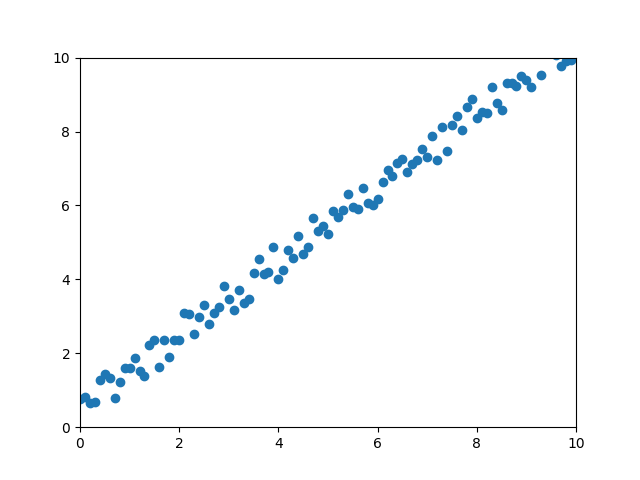

In [34]:
fig, ax = plt.subplots()
line, = plt.plot([],[],"r")

plt.scatter(x,y)
ax.axis([0,10,0,10])
text = ax.text(1,10.2,"")

def animate(frame):
    x_pred = x_list_prediksi[frame]
    y_pred = y_list_prediksi[frame]
    line.set_data(x_pred, y_pred)
    return line,

anim = FuncAnimation(
    fig=fig,
    func=animate,
    frames=jumlah_data,
    interval=100,
    repeat=False
)

plt.show()